NOTE: defining the HOME path constant

In [1]:
from platform import python_version
print(python_version())

3.12.11


In [5]:
import os
HOME = os.getcwd()
print(f'HOME directory path: \'{HOME}\'')

HOME directory path: '/Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training'


### Important ! Add "requirements.txt" file to working directory

#### Installing required packages

In [6]:
path = HOME + 'requirements.txt'
path
# TODO: ERROR encountered when using path/requirements.txt together with !pip install

'/Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_trainingrequirements.txt'

In [4]:
!pip install -r ../../requirements.txt --quiet

### Connecting to Roboflow dataset

In [7]:
import roboflow
roboflow.login(force=True) # Login into roboflow

visit https://app.roboflow.com/auth-cli to get your authentication token.


In [8]:
rf = roboflow.Roboflow()

In [9]:
# Downloading dataset from Roboflow platform (Notice: after execution data will be deleted from google colab)
roboflow_project_name = 'stormdamagechallenge'
dataset_name = 'storm-damage'
dataset_title = 'Storm-Damage'
dataset_id = 'goe2a'
dataset_version = 5
model_name = 'yolo'
model_version = '11' # '8v' or '11'
model_variant = 'n' # parameter required for model training phase

# Connect to roboflow dataset
rf = roboflow.Roboflow()
project = rf.workspace(roboflow_project_name).project(dataset_name + '-' + dataset_id)
dataset = project.version(dataset_version).download(model_name + model_version)

loading Roboflow workspace...
loading Roboflow project...

Version export complete for yolo11 format


### Import remaining packages

In [10]:
import torch

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
from IPython.display import Image

# Progress bar
from tqdm import tqdm

import numpy as np

# Others
import os
import shutil
import zipfile

%matplotlib inline

Check the version of Ultralytics

In [12]:
ultralytics.checks()
# Previously (7 month ago)
# Ultralytics 8.3.49 🚀 Python-3.12.3 torch-2.4.0 CPU (Apple M1 Pro)
# Setup complete ✅ (10 CPUs, 32.0 GB RAM, 376.9/1858.2 GB disk)

Ultralytics 8.3.163 🚀 Python-3.12.11 torch-2.7.1 CPU (Apple M1 Pro)
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 660.2/1858.2 GB disk)


### Loading Yolov8 model

In [13]:
# Loading the model
model = YOLO('../../models/yolov11/yolo11n.pt')
# Display model information (optional)
model.info()

YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

### Training Model

In [14]:
yaml_file = f'{HOME}/{dataset_title}-{dataset_version}/data.yaml'
yaml_file

'/Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training/Storm-Damage-5/data.yaml'

#### Resume model training from last step (optional)

In [ ]:
# Resuming model training from last completed epoch
# model = YOLO('runs/detect/train/weights/last.pt')

In [16]:
# Train the model on the dataset for 20 epochs
batch = -1
device = 'mps' # 0: GPU | 'cpu': cpu | 'mps': apple silicon mps
epochs = 1
patience = 5
imgsz = 128 # optimal image size is 640 but some dataset versions are at 512
plots = True

model.train(
    data=yaml_file, 
    batch = batch,
    device = device,
    epochs = epochs,
    patience = patience,
    optimizer = 'AdamW',
    lr0 = 0.01 ,
    momentum = 0.9,
    imgsz = imgsz,
    plots = plots
)

New https://pypi.org/project/ultralytics/8.3.165 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.163 🚀 Python-3.12.11 torch-2.7.1 MPS (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training/Storm-Damage-5/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=../../models/yolov11

train: Scanning /Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training/Storm-Damage-5/train/labels.cache... 327 images, 138 backgrounds, 0 corrupt: 100%|██████████| 327/327 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=128 at 60.0% CUDA memory utilization.
WARNING ⚠️ AutoBatch: intended for CUDA devices, using default batch-size 16
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 326.5±52.8 MB/s, size: 66.4 KB)



train: Scanning /Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training/Storm-Damage-5/train/labels.cache... 327 images, 138 backgrounds, 0 corrupt: 100%|██████████| 327/327 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 240.6±77.9 MB/s, size: 62.6 KB)



val: Scanning /Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training/Storm-Damage-5/valid/labels.cache... 59 images, 13 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.435G      3.126      2.662      1.246         26        128: 100%|██████████| 21/21 [00:21<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.38s/it]


                   all         59       1023     0.0213      0.375      0.101      0.025

1 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.4MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.12.11 torch-2.7.1 MPS (Apple M1 Pro)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.24s/it]


                   all         59       1023     0.0212      0.375      0.101      0.025
undamagedcommercialbuilding         28        164    0.00913      0.232     0.0515     0.0178
undamagedresidentialbuilding         31        859     0.0334      0.518       0.15     0.0323
Speed: 0.1ms preprocess, 18.6ms inference, 0.0ms loss, 12.0ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x31656db80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [17]:
import numpy
numpy.version.version

'2.2.6'

/Users/constantin/Documents/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training


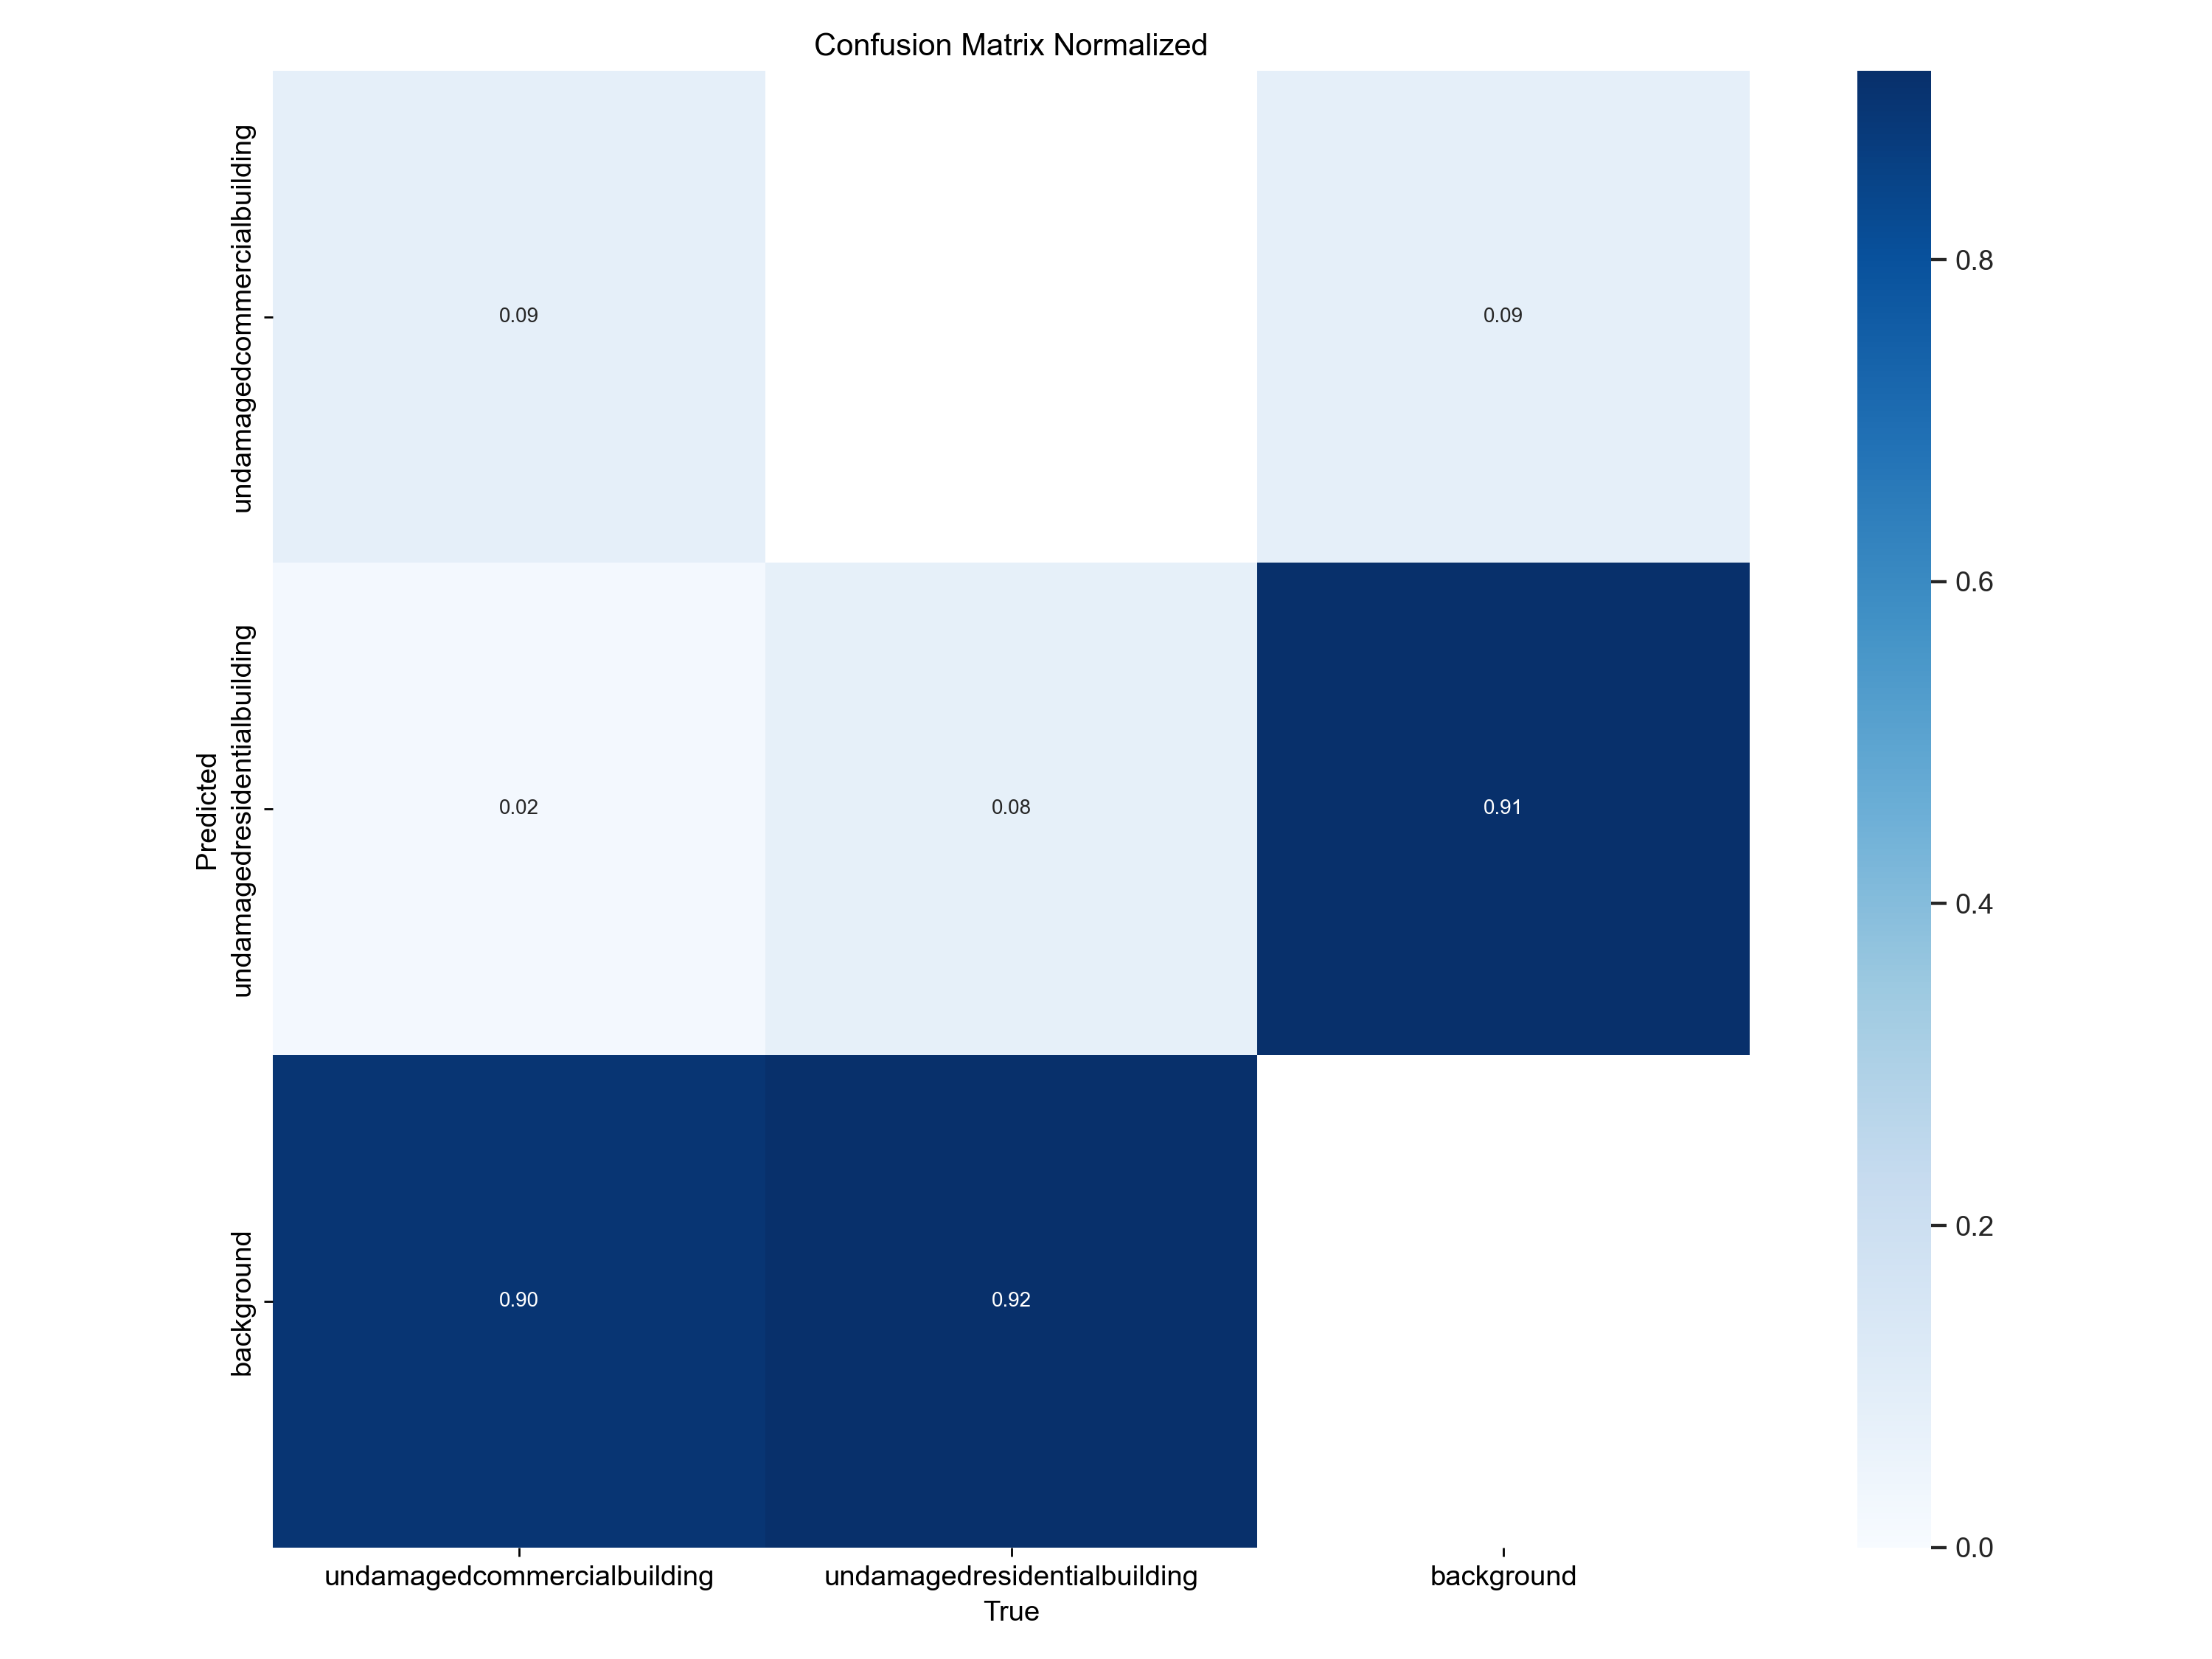

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600) # FIRST RUN: 20 epochs

/Users/atsoc/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training


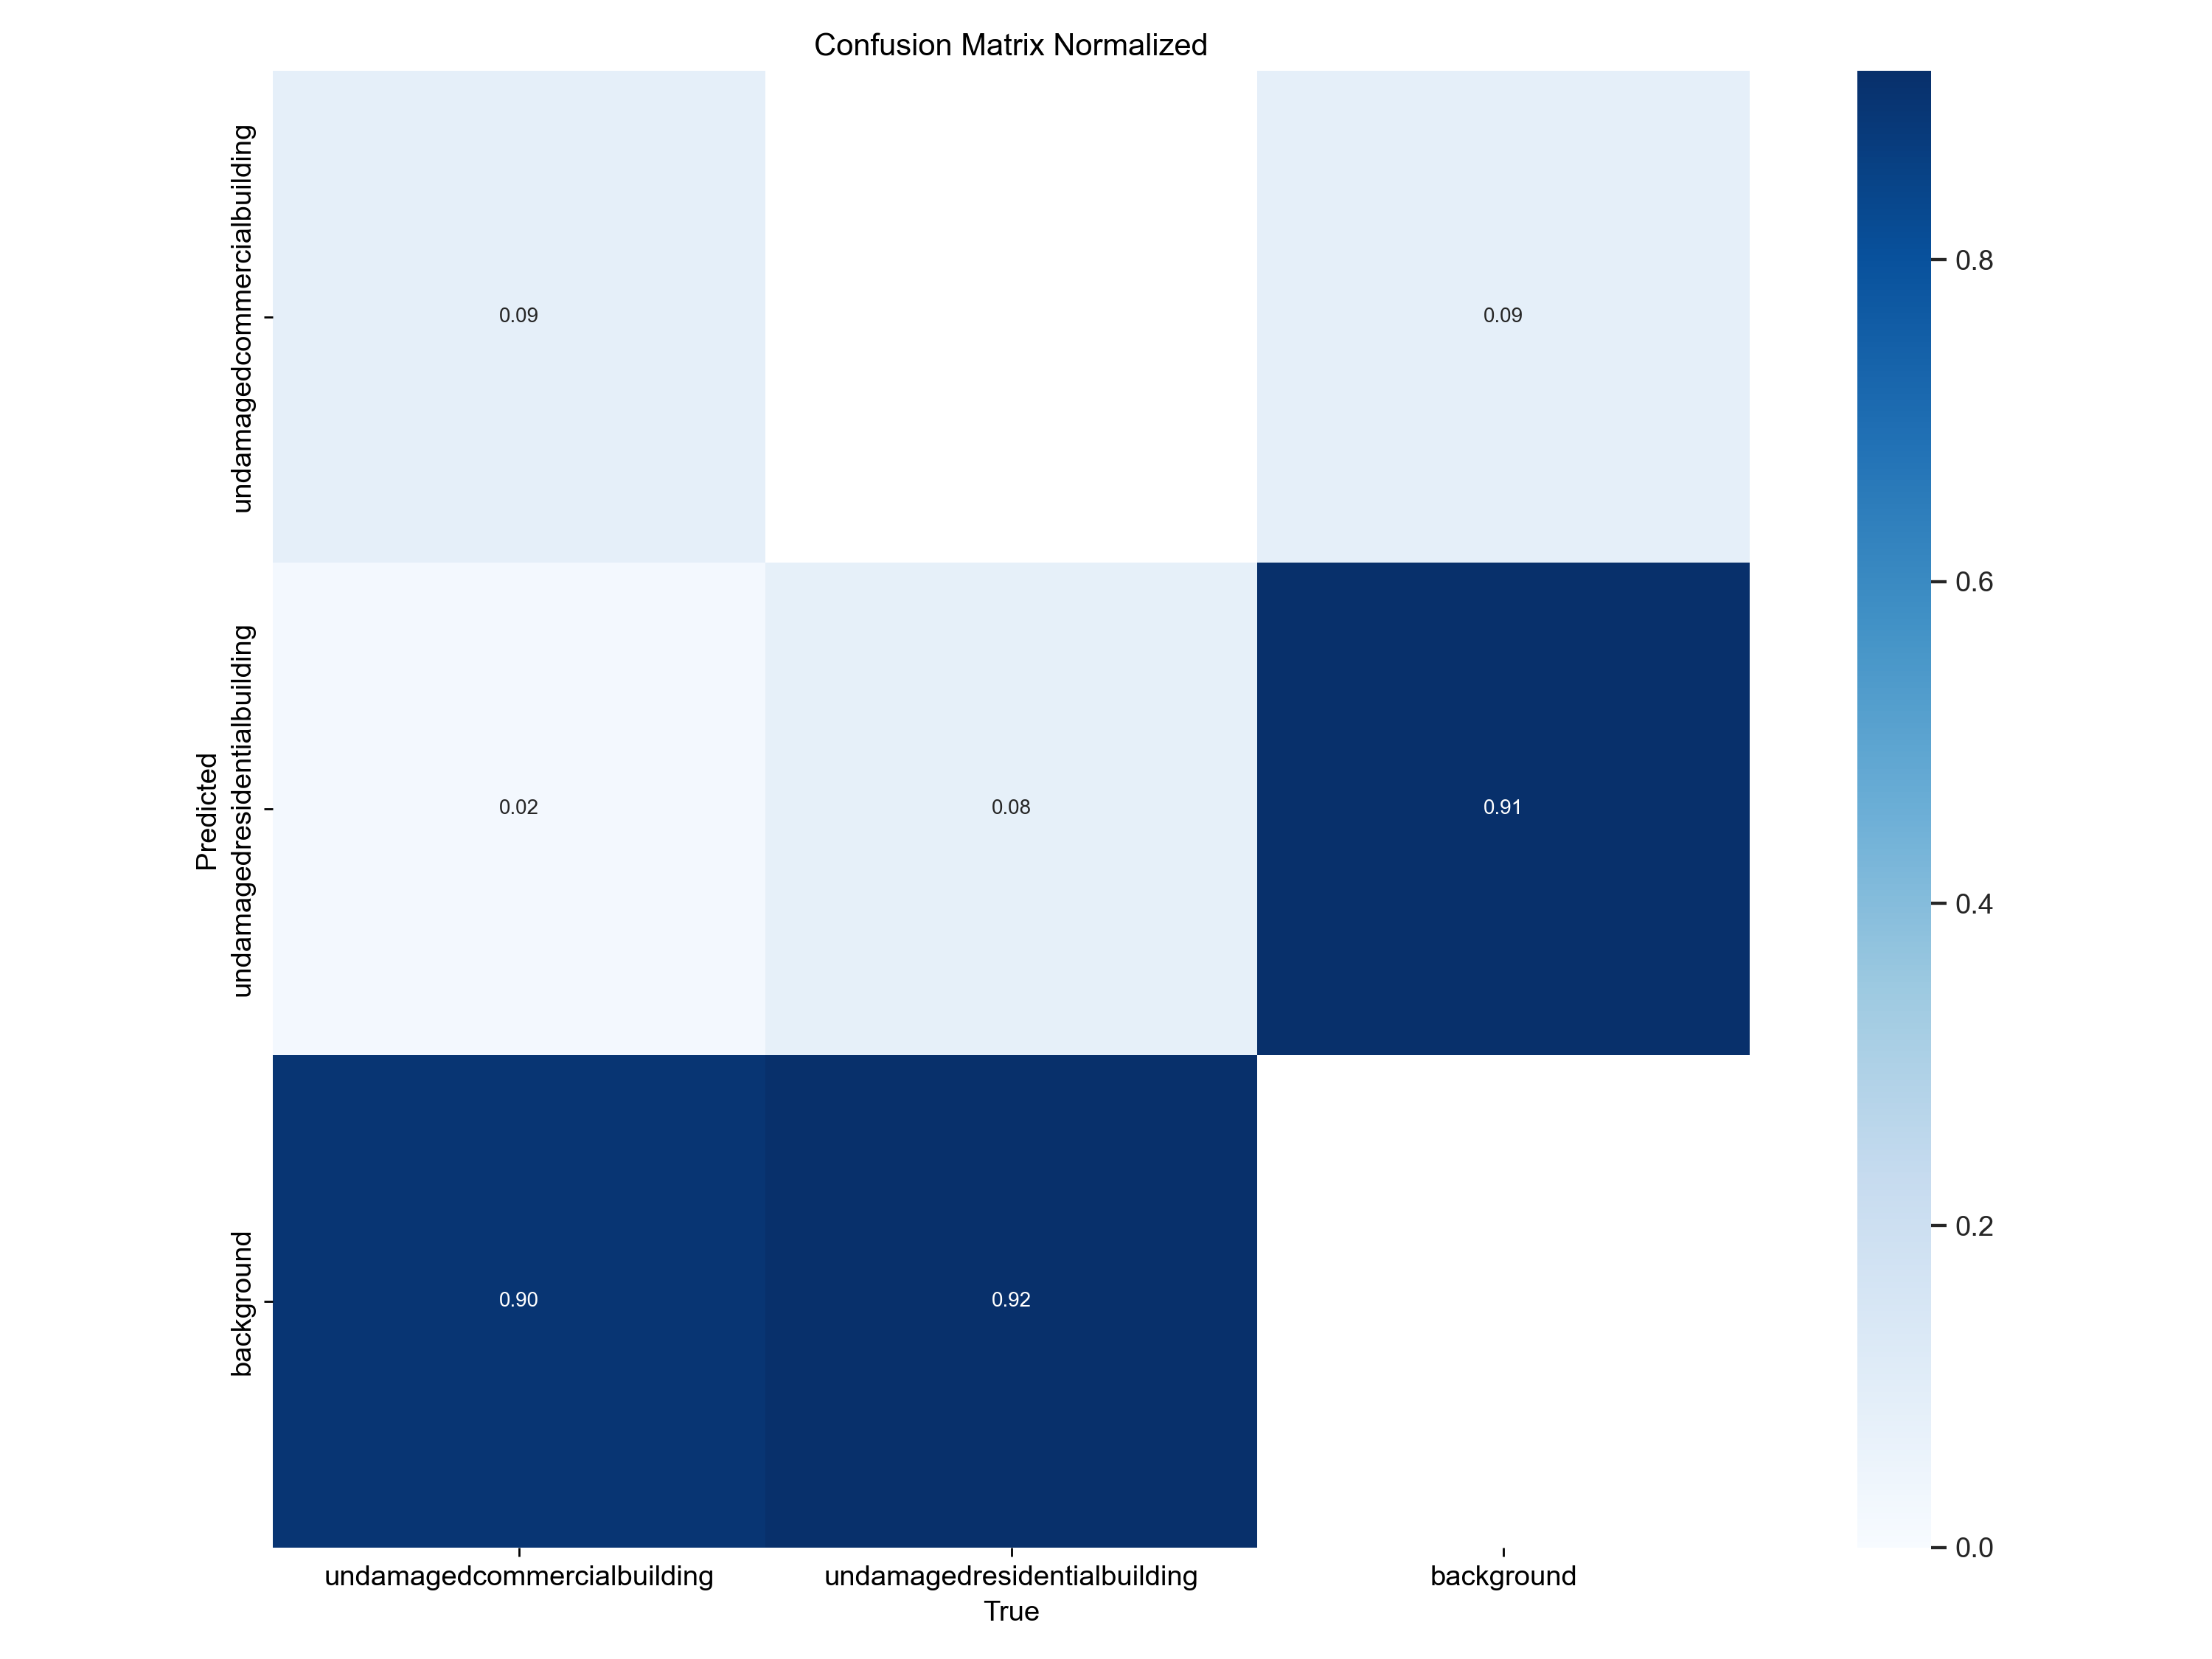

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600) # FIRST RUN: 20 epochs

/Users/atsoc/Python_files/Machine_Learning/EY Challenge/Storm Damage - 2024/notebooks/local_training


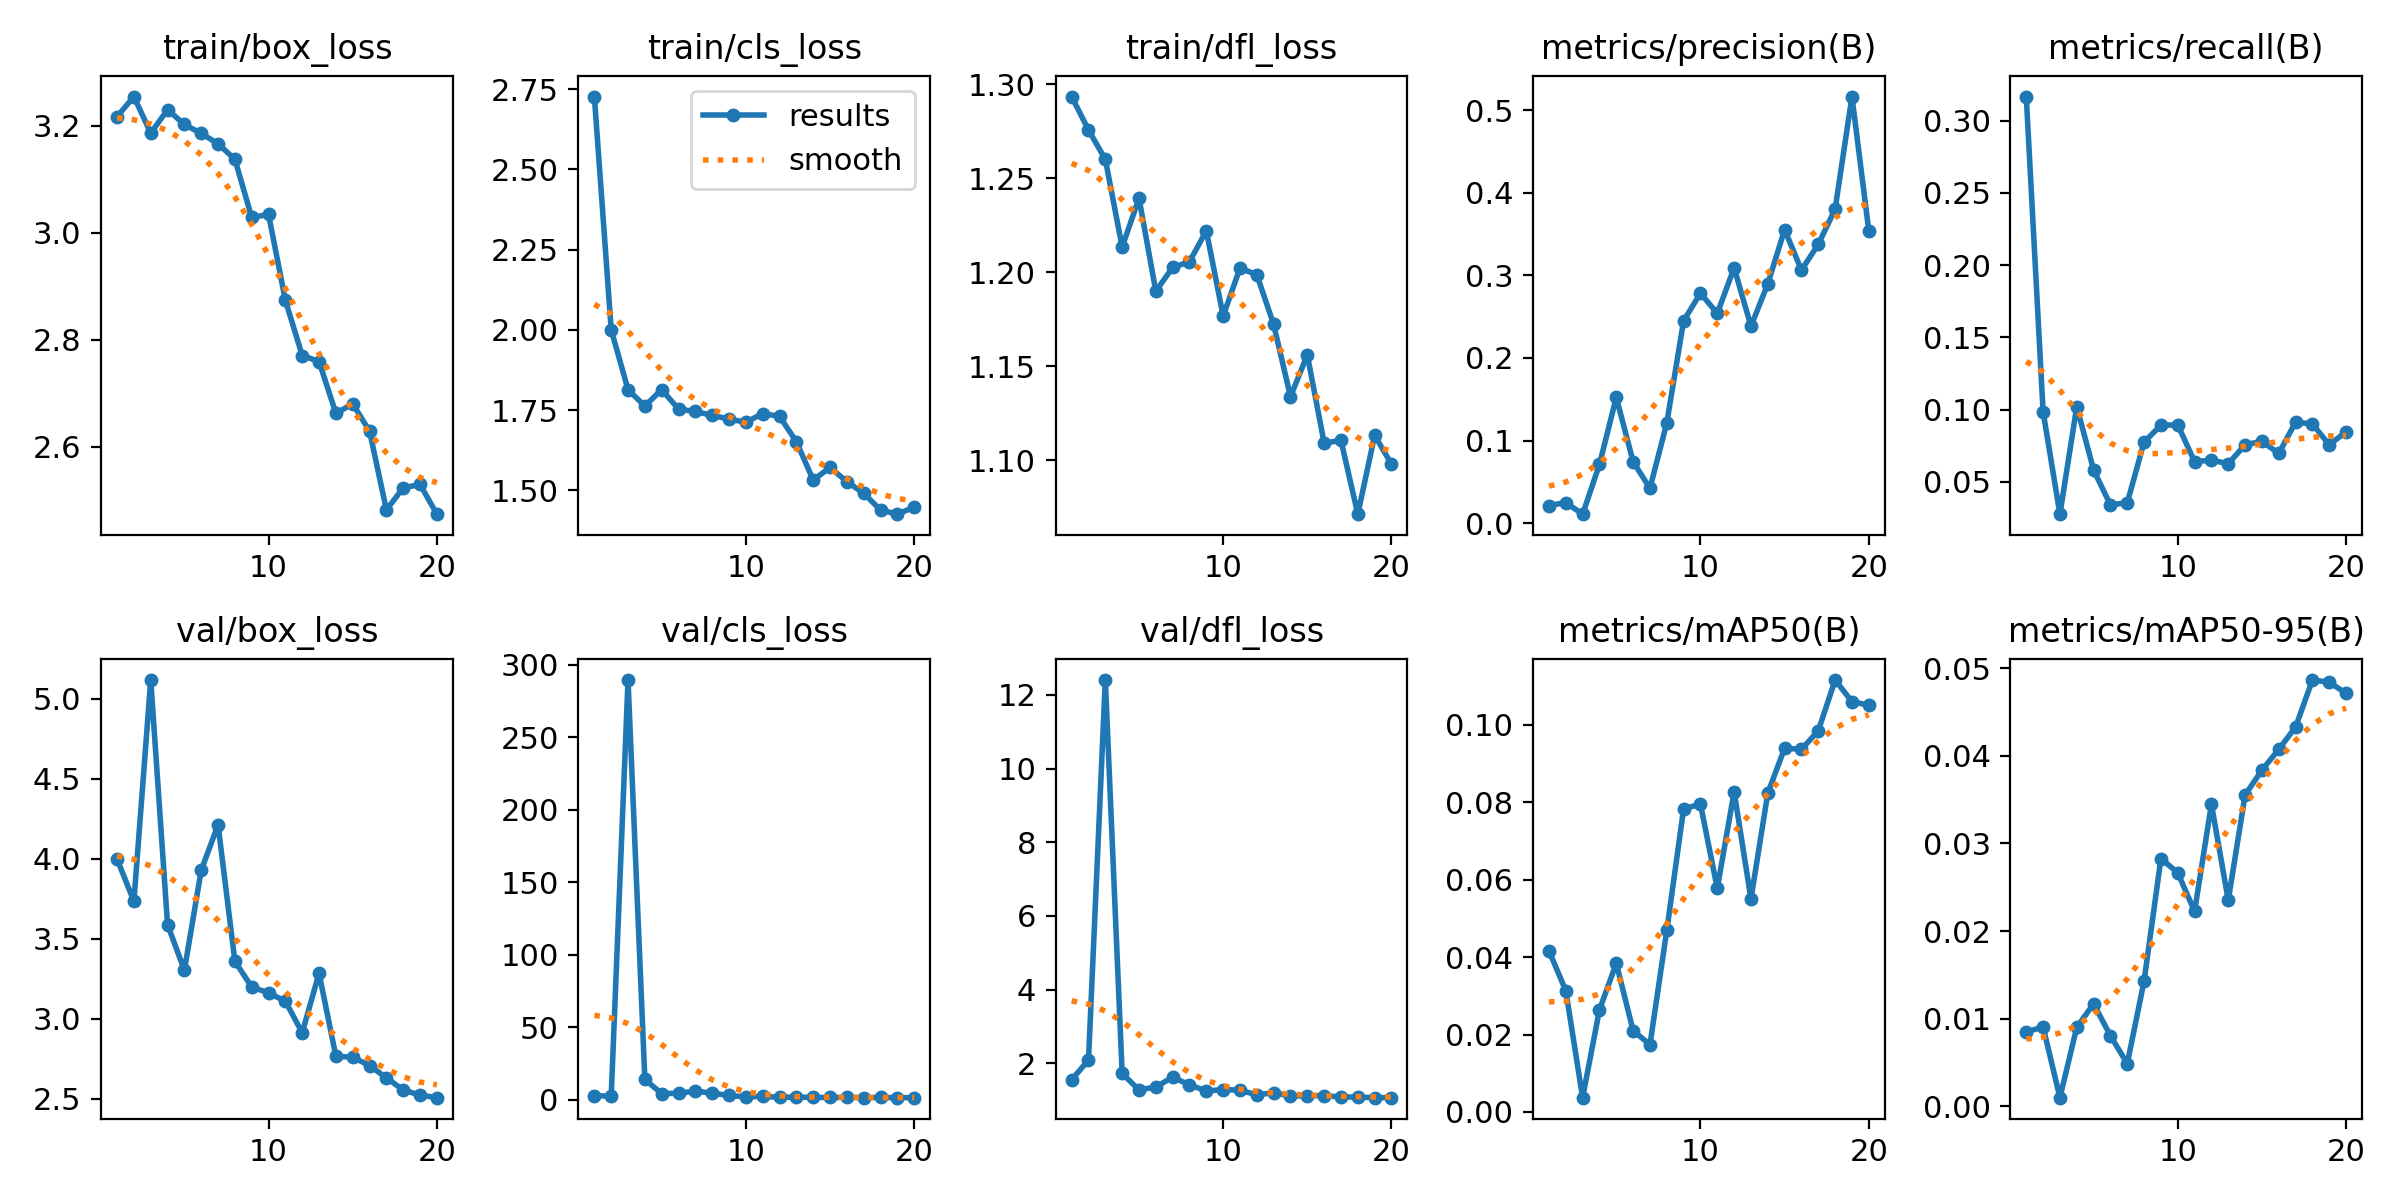

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


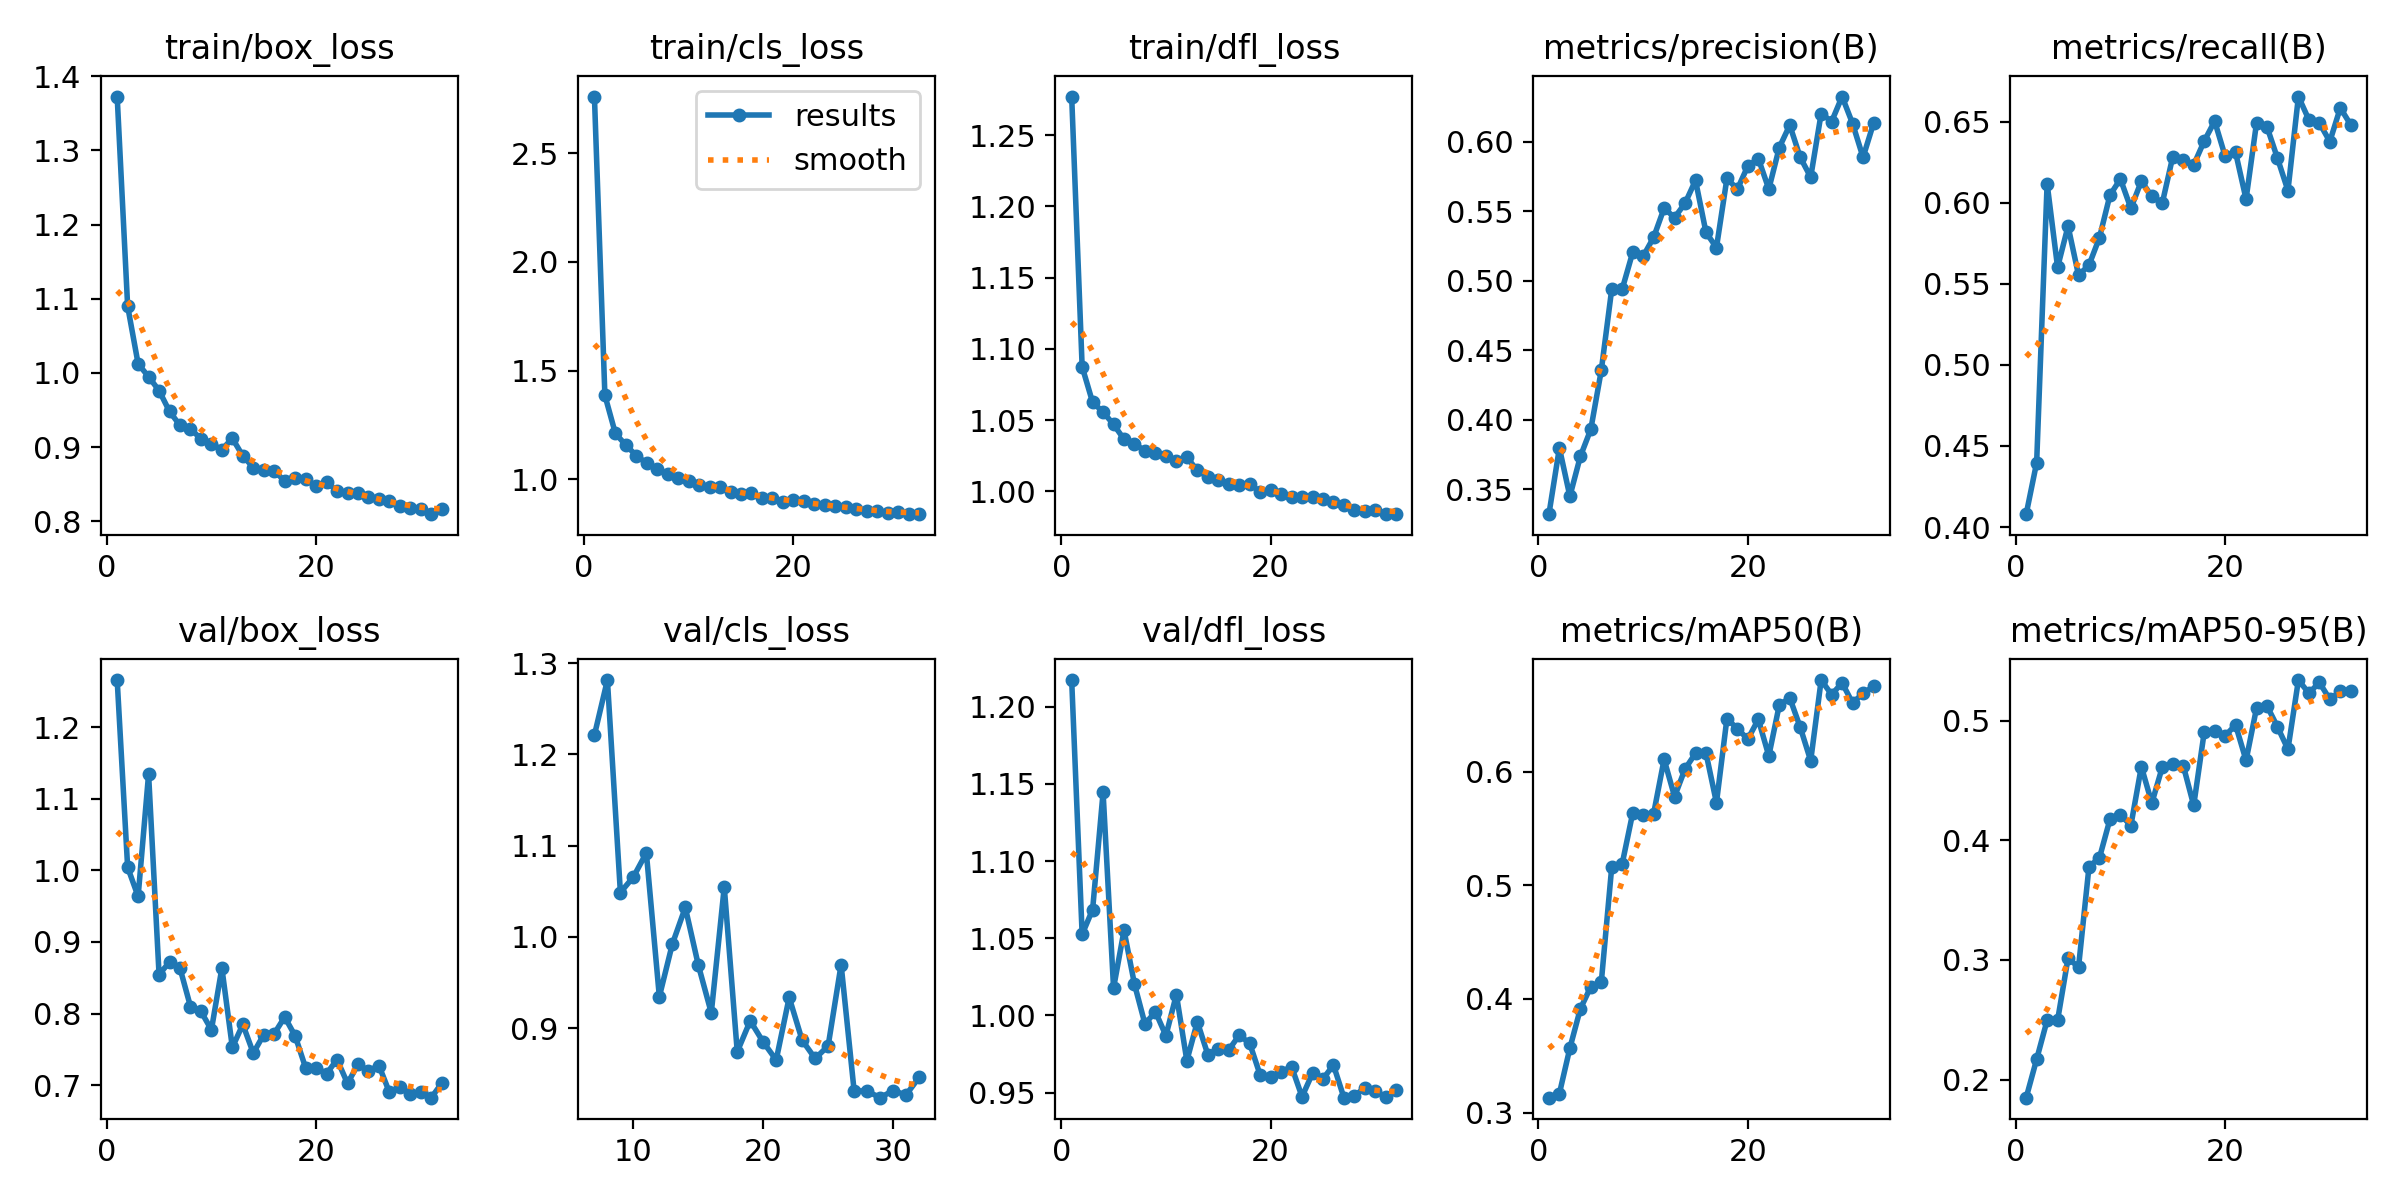

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Downloading Results (.zip file)

In [17]:
from google.colab import files

path_dir_to_zip = '/content/runs/detect/train' #@param {type: "string"}
output_filename = 'train.zip' #@param {type: "string"}
path_zip_file = f'{HOME}/{output_filename}'
delete_zip_file_after_download = "Yes"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , path_dir_to_zip ) )

0

Download the requested zip file

In [18]:
files.download( output_filename )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Delete the created zip file (optional)

In [ ]:
if delete_zip_file_after_download == "Yes":
    os.system( "rm -r {}".format( path_zip_file ) )

# Draft Code (not important)

## Loading Training Datasets

Mound google drive which contains the required training dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Check internet speed (optional)

In [ ]:
!curl -s https://raw.githubusercontent.com/sivel/speedtest-cli/master/speedtest.py | python -

Retrieving speedtest.net configuration...
Testing from Google Cloud (34.126.168.143)...
Retrieving speedtest.net server list...
Selecting best server based on ping...
Hosted by PT. Jala Lintas Media (Semarang) [1171.81 km]: 30.175 ms
Testing download speed................................................................................
Download: 263.09 Mbit/s
Testing upload speed......................................................................................................
Upload: 184.19 Mbit/s


Print the current working directory in google collab

In [ ]:
!pwd

/content


Create a new directory for the dataset

In [ ]:
!mkdir data

In [ ]:
!cp -r ../gdrive/MyDrive/Colab\ Notebooks/datasets/hurricanedamagev7.v2i.yolov8.train.valid /content/data

Copy the whole directory with results to a connected google drive

In [ ]:
!scp -r /content/runs /content/gdrive/My Drive/ComputerVision/TrainingResults # adapt to own folder name